<a href="https://colab.research.google.com/github/Gboavida/datamining2/blob/main/Group13_DM2_2425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><font size="6"> Notebook - Group 13</font><a class="anchor"><a id='toc'></a></b><br><br>

Group 13: \\
Guilherme Boavida $|$ 20240332  \\
João Fernandes $|$ 20240313 \\
Joana Aurelio $|$ 20241160 \\
Maria Pereira $|$ 20240323


# <font color='#BFD72F'> Importing the Data</font>

In [1]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/DM2/Project/'

Mounted at /content/drive


# <font color='#BFD72F'> Libraries</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


# <font color='#BFD72F'> 1. Data Understanding</font>

In [3]:
train = pd.read_csv(path + '/Datasets/patient_train_data.csv')
test = pd.read_csv(path + '/Datasets/patient_test_data.csv')

In [4]:
train.shape

(75035, 32)

In [5]:
train.columns

Index(['ID', 'Alcohol Consumption', 'Cancer Stage', 'Country', 'Date of Birth',
       'Diabetes', 'Diabetes History', 'Diet Risk', 'Early Detection',
       'Family History', 'Gender', 'Genetic Mutation', 'Healthcare Access',
       'Healthcare Costs', 'Heart Disease History', 'Hypertension',
       'Incidence Rate per 100K', 'Inflammatory Bowel Disease',
       'Insurance Costs', 'Insurance Status', 'Marital Status',
       'Mortality Rate per 100K', 'Non Smoker', 'Obesity BMI',
       'Physical Activity', 'Screening History', 'Smoking History',
       'Transfusion History', 'Treatment Type', 'Tumor Size (mm)',
       'Urban or Rural', 'Survival Prediction'],
      dtype='object')

In [6]:
train.head()

,ID,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,...,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction
0,1,No,Localized,UK,29-01-1966,No,No,Moderate,No,No,...,Yes,Overweight,Low,Regular,No,-,Chemotherapy,33.0,Urban,Yes
1,2,No,Regional,Japan,21-12-1958,No,No,Low,No,No,...,No,Normal,Low,Irregular,Yes,-,Chemotherapy,17.0,Urban,No
2,3,No,Localized,France,16-06-1959,No,No,Low,Yes,No,...,No,Normal,Moderate,Never,Yes,-,Surgery,34.0,Urban,Yes
3,4,Yes,Localized,Japan,18-01-1956,Yes,No,Moderate,No,No,...,Yes,Obese,Low,Regular,No,-,Radiotherapy,71.0,Urban,No
4,5,No,Regional,USA,04-05-1975,No,No,Moderate,Yes,Yes,...,Yes,Overweight,Low,Regular,No,-,Radiotherapy,48.0,Rural,Yes


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75035 entries, 0 to 75034
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75035 non-null  int64  
 1   Alcohol Consumption         74983 non-null  object 
 2   Cancer Stage                75022 non-null  object 
 3   Country                     74985 non-null  object 
 4   Date of Birth               74975 non-null  object 
 5   Diabetes                    75021 non-null  object 
 6   Diabetes History            75035 non-null  object 
 7   Diet Risk                   74987 non-null  object 
 8   Early Detection             75005 non-null  object 
 9   Family History              74989 non-null  object 
 10  Gender                      74956 non-null  object 
 11  Genetic Mutation            75005 non-null  object 
 12  Healthcare Access           74972 non-null  object 
 13  Healthcare Costs            749

<font color='grey'>Understanding the Data</font>

This dataset contains **75035 rows** and **32 columns**. There are 24 variables with less than 75035 values, which indicates the presence of missing values.
<br><br>


**-> Insured Identifier**:
- `ID` - Unique identifier for each patient in the dataset.


**-> Sociodemographic Data**:
- `Date of Birth` - Patient’s date of birth.
- `Gender` - Patient gender (M or F).
- `Country` - Country of origin of the patient.
- `Urban or Rural` - Type of residential area where the patient lives.
- `Marital Status` - Marital status of the patient.


**-> Clinical & Genetic Data**:
- `Cancer Stage` - Clinical cancer stage (Localized, Regional, or Metastatic).
- `Tumor Size (mm)` - Measured size of the tumor in millimeters.
- `Inflammatory Bowel Disease` - Whether the patient has Inflammatory Bowel Disease (Yes or No).
-  `Genetic Mutation`- Presence of genetic mutation (Yes or No).
- `Diabetes` = Whether the patient has diabetes (Yes or No).
- `Diabetes History` = Whether the patient has a history of diabetes (Yes or No).
- `Hypertension` = Whether the patient has hypertension (Yes or No).
- `Heart Disease History` = History of heart-related diseases (Yes or No).


**-> Lifestyle & Behavioral Data**
- `Family History` - Family history of similar cancer (Yes or No).
- `Smoking History` - Whether the patient is or was a smoker (Yes or No).
- `Non Smoker` - Whether the patient is a non-smoker (Yes or No).
- `Alcohol Consumption` - Regular alcohol consumption (Yes or No).
- `Obesity BMI` - BMI classification (Normal, Overweight, Obese).
- `Diet Risk` - Dietary risk level (Low, Moderate, High).
- `Physical Activity` - Level of physical activity (Low, Moderate, High).

**-> Healthcare Access & Treatment**
- `Early Detection` - Whether the cancer was detected early (Yes or No).
- `Treatment Type` - Type of treatment received (Surgery, Chemotherapy, Radiotherapy, or Combination).
- `Screening History` - Frequency of cancer screenings (Regular, Irregular, Never).
- `Transfusion History` - Whether the patient has received blood transfusions (Yes or No).
- `Healthcare Access` - Availability of healthcare in the region (Low, Moderate, High).
- `Insurance Status` - Whether the patient is insured or uninsured (Insured, Uninsured).

**-> Health Economics**
- `Healthcare Costs` - Total healthcare-related costs.
- `Insurance Costs` - Type of insurance coverage (No insurance, Basic, Extended).

**-> Epidemiological Context**
- `Incidence Rate per 100K` - Country-level colorectal cancer incidence rate.
- `Mortality Rate per 100K` - Country-level colorectal cancer mortality rate.

**-> Target Variable**
- `Survival Prediction` - Whether the patient survived or not. Only present in the training dataset.



## <font color='#BFD72F'> 1.1 Descriptive Statistics</font>

In [8]:
train.describe()

,ID,Healthcare Costs,Incidence Rate per 100K,Marital Status,Mortality Rate per 100K,Tumor Size (mm)
count,75035.000000,74982.000000,74999.000000,0.0,74974.000000,74962.000000
mean,37518.000000,72551.277478,34.552283,NaN,17.054440,42.054665
std,21660.883061,27536.228351,14.511506,NaN,7.206834,21.733090
min,1.000000,-69123.238747,10.000000,NaN,-16.612959,5.000000
25%,18759.500000,48788.250000,22.000000,NaN,11.000000,23.000000
50%,37518.000000,72531.500000,34.000000,NaN,17.000000,42.000000
75%,56276.500000,96426.750000,47.000000,NaN,23.000000,61.000000
max,75035.000000,213690.042716,109.212990,NaN,51.679554,155.758628


In [9]:
train.describe(include = ['O'])

,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,...,Insurance Status,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Urban or Rural,Survival Prediction
count,74983,75022,74985,74975,75021,75035,74987,75005,74989,74956,...,74974,75035,75011,74972,74982,74974,75035,74972,74984,75035
unique,2,3,16,11062,2,2,3,2,2,3,...,2,2,3,3,3,2,1,4,4,2
top,No,Regional,USA,09-06-1949,No,No,Moderate,Yes,No,M,...,Insured,Yes,Overweight,Moderate,Regular,No,-,Surgery,Urban,Yes
freq,37510,29882,11627,19,60078,75025,37630,44883,52458,44999,...,52776,44877,30035,29898,30152,44836,75035,29882,49834,45069


# <font color='#BFD72F'> 2. Data Preprocessing (Train Dataset) </font>

## <font color='#BFD72F'> 2.1 Handling Incoherences</font>

In [10]:
train['Survival Prediction'].value_counts(dropna=False)

,count
Survival Prediction,
Yes,45069
No,29966


In [11]:
unique_ID = train['ID'].is_unique
unique_ID

True

In [12]:
train = train.set_index('ID')

In [13]:
incoherent_1 = train[(train['Non Smoker'] == 'Yes') & (train['Smoking History'] == 'Yes')]

incoherent_2 = train[(train['Non Smoker'] == 'No') & (train['Smoking History'] == 'No')]

print("Non Smoker = Yes & Smoking History = Yes:", incoherent_1.shape[0])
print("Non Smoker = No & Smoking History = No:", incoherent_2.shape[0])


Non Smoker = Yes & Smoking History = Yes: 0
Non Smoker = No & Smoking History = No: 0


A logical consistency check was performed between the variables `Non Smoker` and `Smoking History`, as it is expected that a patient who identifies as a non-smoker should not report having a smoking history. The analysis confirmed that no contradictory cases were found, indicating that the dataset is coherent in this regard.

In [14]:
negative_costs = train[train['Healthcare Costs'] < 0]

print(f"Number of patients with negative Healthcare Costs values: {negative_costs.shape[0]}")

Number of patients with negative Healthcare Costs values: 11


In [15]:
train.loc[train['Healthcare Costs'] < 0, 'Healthcare Costs'] = np.nan

In [16]:
negative_costs = train[train['Healthcare Costs'] < 0]

print(f"Number of patients with negative Healthcare Costs values: {negative_costs.shape[0]}")

Number of patients with negative Healthcare Costs values: 0


A total of 11 patients were found to have negative values in the `Healthcare Costs` variable, which is invalid. These values were identified and replaced with `NaN` to ensure consistency in the dataset. They will be properly addressed later during the missing value treatment stage.

In [17]:
train['Gender'].value_counts(dropna=False)

,count
Gender,
M,44999
F,29949
NaN,79
P,8


In [18]:
train.loc[train['Gender'] == 'P', 'Gender'] = np.nan

In [19]:
train['Gender'].value_counts(dropna=False)

,count
Gender,
M,44999
F,29949
NaN,87


An inconsistency was detected in the `Gender` variable, where 8 entries were labeled as "P", which is not a valid category. These values were considered incoherent and replaced with `NaN` to be addressed later during the missing value treatment phase. As a result, the total number of missing values in the Gender column increased from 79 to 87.

In [20]:
negative_mortality = train[train['Mortality Rate per 100K'] < 0]
print(f"Number of patients with negative Mortality Rate values: {negative_mortality.shape[0]}")

Number of patients with negative Mortality Rate values: 2


In [21]:
train.loc[train['Mortality Rate per 100K'] < 0, 'Mortality Rate per 100K'] = np.nan

In [22]:
negative_mortality = train[train['Mortality Rate per 100K'] < 0]
print(f"Number of patients with negative Mortality Rate values: {negative_mortality.shape[0]}")

Number of patients with negative Mortality Rate values: 0


Two entries in the `Mortality Rate per 100K` variable were found to contain negative values, which are not valid. These values were flagged as incoherent and replaced with `NaN` to preserve data quality. They will be treated accordingly during the missing value handling phase.

In [23]:
train['Healthcare Access'].value_counts()

,count
Healthcare Access,
Moderate,37197
High,22639
Low,15120
?,16


In [24]:
train['Healthcare Access'] = train['Healthcare Access'].replace('?', np.nan)

In [25]:
train['Healthcare Access'].value_counts()

,count
Healthcare Access,
Moderate,37197
High,22639
Low,15120


In the variable `Healthcare Access`, the value `?` was identified as a placeholder for missing or undefined information. To ensure consistency in missing value handling, all occurrences of `?` were replaced with `NaN`.

In [26]:
print(train['Urban or Rural'].value_counts())

Urban or Rural
Urban    49834
Rural    21329
urban     2701
rural     1120
Name: count, dtype: int64


In [27]:
train['Urban or Rural'] = train['Urban or Rural'].str.capitalize()

In [28]:
print(train['Urban or Rural'].value_counts())

Urban or Rural
Urban    52535
Rural    22449
Name: count, dtype: int64


Inconsistencies were found in the `Urban or Rural` variable due to differences in letter casing (e.g., `urban` vs `Urban`).
To correct this, all values were standardized using `.str.capitalize()`.

## <font color='#BFD72F'> 2.2 Create Variable Age</font>

In [29]:
train['Date of Birth'] = pd.to_datetime(train['Date of Birth'], errors='coerce')

current_date = datetime.now()
train['Age'] = train['Date of Birth'].apply(lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) else np.nan)


<ipython-input-29-9e77b929bf7d>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train['Date of Birth'] = pd.to_datetime(train['Date of Birth'], errors='coerce')


In [30]:
train['Age'].max()

89.0

In [31]:
train['Age'].min()

29.0

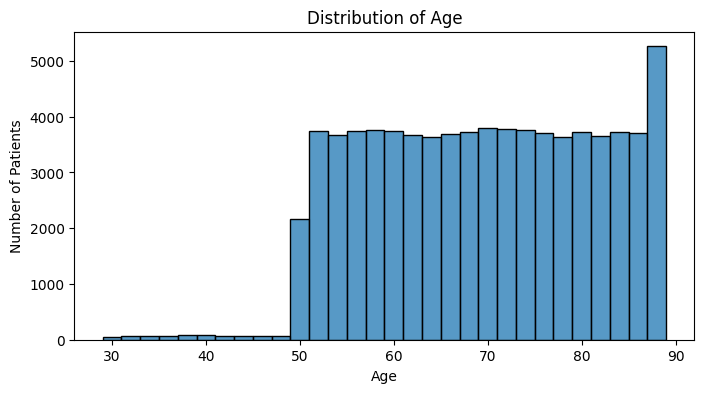

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(train['Age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

In [33]:
train.drop(columns='Date of Birth', inplace=True)

A new variable `Age` was derived from the `Date of Birth` field by calculating the difference in years from the current date. This transformation facilitates numerical analysis and modeling by providing a more interpretable and continuous feature. The resulting Age variable ranges from 29 to 89 years old. As expected in a colorectal cancer dataset, most patients fall within the older adult population. A small number of records with missing birth dates were converted to `NaN` and will be treated in the missing value handling phase.

## <font color='#BFD72F'> 2.3 Data Visualization</font>

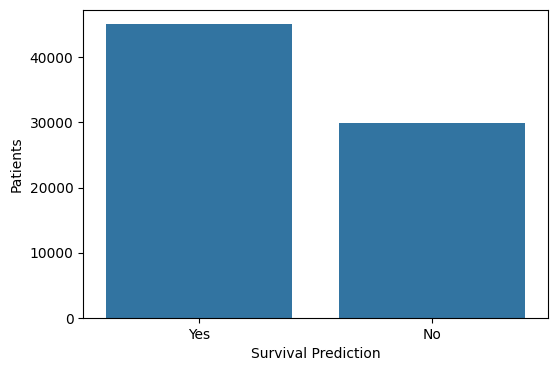

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survival Prediction', data=train)
plt.ylabel('Patients')
plt.show()

The dataset shows a moderate class imbalance, with more patients surviving than not surviving.

Text(0, 0.5, 'Number of Patients')

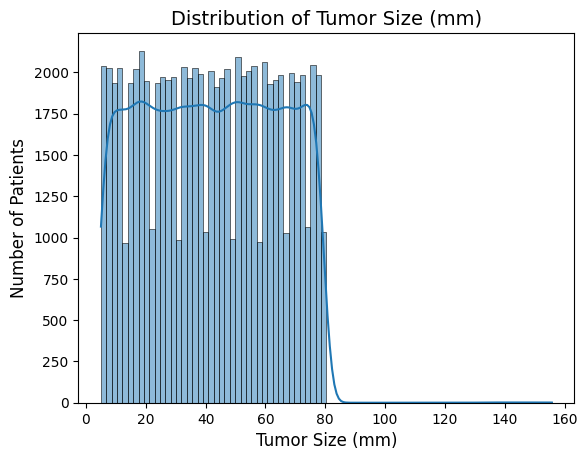

In [35]:
sns.histplot(train['Tumor Size (mm)'], kde=True)
plt.title('Distribution of Tumor Size (mm)', fontsize=14)
plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

Most tumors are between 5 and 80 mm, with a sharp drop beyond that, indicating that extremely large tumors are rare in this dataset.

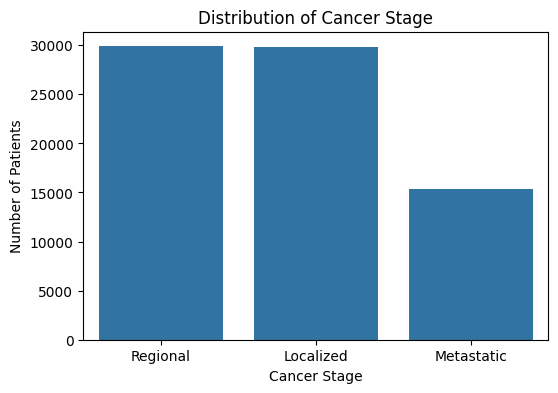

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancer Stage', data=train, order=train['Cancer Stage'].value_counts().index)
plt.title('Distribution of Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

Most patients are diagnosed at the Regional and Localized stages, with fewer cases reaching the Metastatic stage.

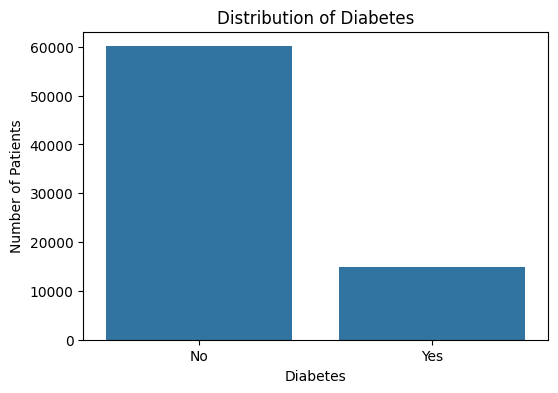

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=train)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')
plt.show()

The majority of patients in the dataset do not have diabetes, although a notable minority does, which suggests that diabetes may be a relevant comorbidity to explore in relation to cancer survival.

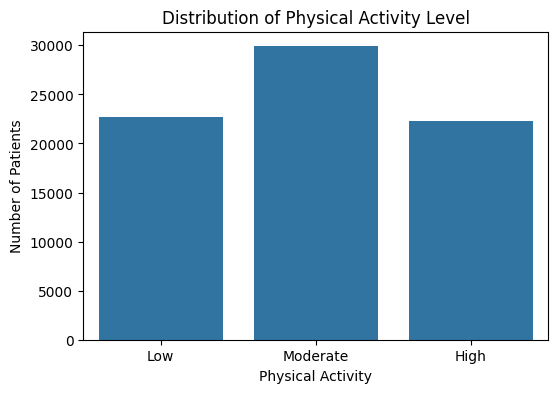

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Physical Activity', data=train, order=['Low', 'Moderate', 'High'])
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity')
plt.ylabel('Number of Patients')
plt.show()

Most patients report a moderate level of physical activity, with low and high activity levels being similarly less common. This suggests a balanced distribution with potential relevance for survival analysis.

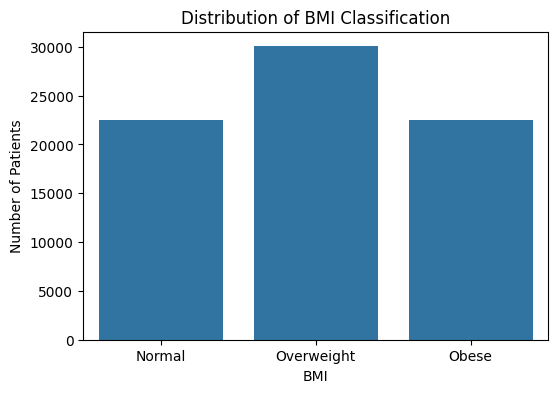

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Obesity BMI', data=train, order=['Normal', 'Overweight', 'Obese'])
plt.title('Distribution of BMI Classification')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()

Most patients fall into the Overweight category, while Normal and Obese classifications are equally less common.

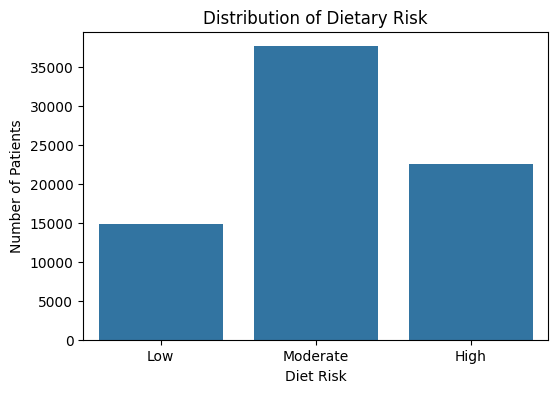

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diet Risk', data=train, order=['Low', 'Moderate', 'High'])
plt.title('Distribution of Dietary Risk')
plt.xlabel('Diet Risk')
plt.ylabel('Number of Patients')
plt.show()

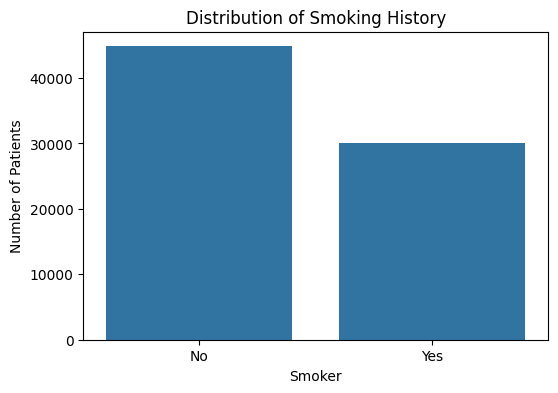

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Smoking History', data=train)
plt.title('Distribution of Smoking History')
plt.xlabel('Smoker')
plt.ylabel('Number of Patients')
plt.show()

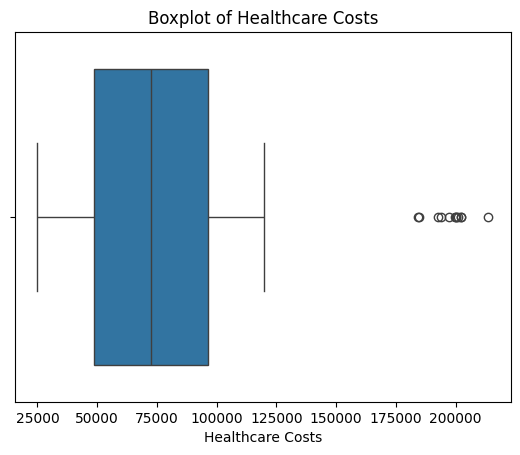

In [42]:
sns.boxplot(x=train['Healthcare Costs'])
plt.title('Boxplot of Healthcare Costs')
plt.xlabel('Healthcare Costs')
plt.show()


Healthcare Costs show a wide range with several high-end outliers. Previously existing negative values, which were not clinically valid, have been replaced with NaN to preserve data quality. The remaining distribution appears positively skewed, with a concentration of patients below 125,000 in cost.

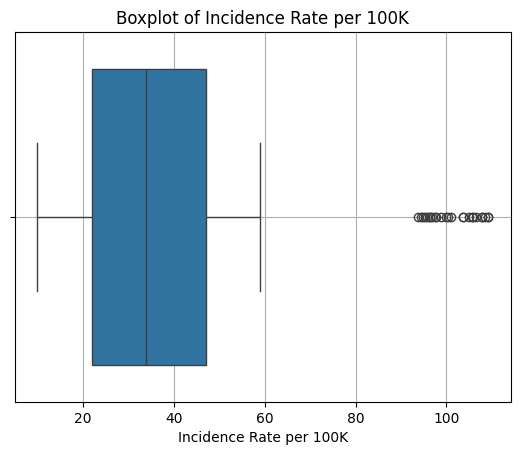

In [43]:
sns.boxplot(x=train['Incidence Rate per 100K'])
plt.title('Boxplot of Incidence Rate per 100K')
plt.xlabel('Incidence Rate per 100K')
plt.grid(True)
plt.show()


The majority of incidence rates range from approximately 20 to 60 cases per 100K, with several outliers exceeding 90. These high values may reflect countries with higher colorectal cancer detection or prevalence.

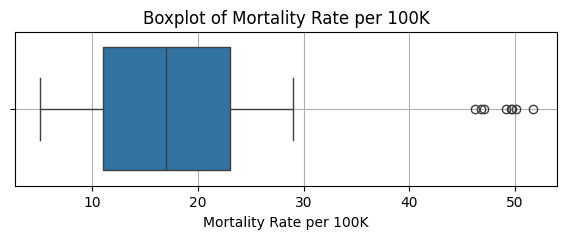

In [44]:
plt.figure(figsize=(7, 2))
sns.boxplot(x=train['Mortality Rate per 100K'])
plt.title('Boxplot of Mortality Rate per 100K')
plt.xlabel('Mortality Rate per 100K')
plt.grid(True)
plt.show()


Most mortality rates lie between approximately 8 and 28 deaths per 100K, with a few outliers on the upper end.

## <font color='#BFD72F'> 2.4 Treating Unary and Empty Variables </font>

In [45]:
train_unary_variables = train.columns[train.nunique() == 1]
print('Unary Variables: ', train_unary_variables)

Unary Variables:  Index(['Transfusion History'], dtype='object')


In [46]:
train['Transfusion History'].value_counts()

,count
Transfusion History,
-,75035


In [47]:
train = train.drop('Transfusion History', axis=1)

In [48]:
empty_columns = train.columns[(train.isnull().all()) | (train.eq('').all())]
print("Columns with no useful values:", empty_columns)


Columns with no useful values: Index(['Marital Status'], dtype='object')


In [49]:
train['Marital Status'].value_counts()

,count
Marital Status,


In [50]:
train = train.drop('Marital Status', axis=1)

## <font color='#BFD72F'> 2.5 Handling Duplicate Values </font>

In [51]:
train_duplicates = train.duplicated().sum()
print("Number of Duplicate Rows:", train_duplicates)

Number of Duplicate Rows: 15


## <font color='#BFD72F'> 2.6 Treating Outliers </font>

In [52]:
Q1 = train['Tumor Size (mm)'].quantile(0.25)
Q3 = train['Tumor Size (mm)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = train[(train['Tumor Size (mm)'] < lower) | (train['Tumor Size (mm)'] > upper)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 19


Although 19 outliers were detected in the `Tumor Size` variable using the IQR method, they were retained in the dataset as they represent plausible clinical cases. Given that tumor size can vary significantly depending on the stage and time of diagnosis, these values may carry predictive value for survival.

In [53]:
Q1 = train['Healthcare Costs'].quantile(0.25)
Q3 = train['Healthcare Costs'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = train[(train['Healthcare Costs'] < lower) | (train['Healthcare Costs'] > upper)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 12


In [54]:
Q1 = train['Healthcare Costs'].quantile(0.25)
Q3 = train['Healthcare Costs'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = train[(train['Healthcare Costs'] < lower) | (train['Healthcare Costs'] > upper)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 12


Outliers in the `Healthcare Costs` variable were identified using the Interquartile Range (IQR) method. A total of 12 extreme values were found outside the calculated IQR bounds. To minimize the influence of these outliers while retaining all records, a capping strategy was applied: all values below the lower bound and above the upper bound were clipped to those respective limits using NumPy's clip() function. After this transformation, no outliers remained in the distribution.

In [55]:
Q1 = train['Incidence Rate per 100K'].quantile(0.25)
Q3 = train['Incidence Rate per 100K'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = train[(train['Incidence Rate per 100K'] < lower) | (train['Incidence Rate per 100K'] > upper)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 25


Although 25 outliers were detected in the `Incidence Rate per 100K` variable using the IQR method, they were retained in the dataset as they represent plausible epidemiological values observed in certain countries. Applying capping could distort real-world differences in cancer incidence rates.

## <font color='#BFD72F'> 2.7 Missing Values </font>

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75035 entries, 1 to 75035
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol Consumption         74983 non-null  object 
 1   Cancer Stage                75022 non-null  object 
 2   Country                     74985 non-null  object 
 3   Diabetes                    75021 non-null  object 
 4   Diabetes History            75035 non-null  object 
 5   Diet Risk                   74987 non-null  object 
 6   Early Detection             75005 non-null  object 
 7   Family History              74989 non-null  object 
 8   Gender                      74948 non-null  object 
 9   Genetic Mutation            75005 non-null  object 
 10  Healthcare Access           74956 non-null  object 
 11  Healthcare Costs            74971 non-null  float64
 12  Heart Disease History       75035 non-null  object 
 13  Hypertension                75035 no

In [57]:
missing = train.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Gender                        87
Healthcare Access             79
Tumor Size (mm)               73
Healthcare Costs              64
Mortality Rate per 100K       63
Treatment Type                63
Physical Activity             63
Smoking History               61
Insurance Status              61
Age                           60
Screening History             53
Alcohol Consumption           52
Urban or Rural                51
Country                       50
Diet Risk                     48
Family History                46
Incidence Rate per 100K       36
Inflammatory Bowel Disease    31
Early Detection               30
Genetic Mutation              30
Obesity BMI                   24
Diabetes                      14
Cancer Stage                  13
dtype: int64


In [58]:
train.shape

(75035, 29)

In [59]:
threshold = int(train.shape[1] * 0.8)
train = train.dropna(thresh=threshold)

In [60]:
train.shape

(75035, 29)

A threshold of 80% non-missing values was applied to remove rows with insufficient data. No rows were removed, indicating that all records had enough valid information to be retained for further analysis.

### Treating Missing Values from the `Smoking History` column based on the consistency we used above

In [61]:
print(train['Smoking History'].value_counts())

Smoking History
No     44836
Yes    30138
Name: count, dtype: int64


In [62]:
train.loc[(train['Smoking History'].isnull()) & (train['Non Smoker'] == 'Yes'), 'Smoking History'] = 'No'
train.loc[(train['Smoking History'].isnull()) & (train['Non Smoker'] == 'No'), 'Smoking History'] = 'Yes'

In [63]:
print(train['Smoking History'].value_counts())

Smoking History
No     44877
Yes    30158
Name: count, dtype: int64


### Treating Missing Values with Mode and Median

In [64]:
for col in ['Healthcare Costs', 'Mortality Rate per 100K', 'Incidence Rate per 100K','Age','Tumor Size (mm)']:
    print(f"{col} median:", train[col].median())

# Mediana de Age com arredondamento
age_median = round(train['Age'].median())
print("Age median (rounded):", age_median)

Healthcare Costs median: 72533.0
Mortality Rate per 100K median: 17.0
Incidence Rate per 100K median: 34.0
Age median: 69.0
Tumor Size (mm) median: 42.0
Age median (rounded): 69


In [65]:
for col in ['Gender', 'Country', 'Physical Activity', 'Alcohol Consumption', 'Genetic Mutation','Insurance Status','Screening History',
            'Diabetes', 'Early Detection','Obesity BMI','Inflammatory Bowel Disease','Diet Risk','Family History'
            ,'Cancer Stage','Treatment Type']:
    train[col] = train[col].fillna(train[col].mode()[0])

In [66]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [67]:
train['Age'] = train['Age'].astype(int)

In [68]:
for col in ['Healthcare Costs', 'Mortality Rate per 100K', 'Incidence Rate per 100K','Tumor Size (mm)']:
    train[col] = train[col].fillna(train[col].median())

In [69]:
missing = train.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Healthcare Access    79
Urban or Rural       51
dtype: int64


Missing values in `categorical variables` were imputed using the `Mode`. Missing values in `numeric variables` were imputed using `Median`.

### Treating Missing Values with Random Forest Classifier

In [70]:
print(train['Urban or Rural'].value_counts())

Urban or Rural
Urban    52535
Rural    22449
Name: count, dtype: int64


In [71]:
train['Urban or Rural'] = train['Urban or Rural'].replace(np.nan, 'unknown')

known_data = train[train['Urban or Rural'] != 'unknown']
unknown_data = train[train['Urban or Rural'] == 'unknown']

X_known = known_data[['Country', 'Healthcare Access', 'Insurance Status', 'Early Detection']]
y_known = known_data['Urban or Rural']

X_unknown = unknown_data[['Country', 'Healthcare Access', 'Insurance Status', 'Early Detection']]


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_unknown_encoded = encoder.transform(X_unknown)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

predicted_values = model.predict(X_unknown_encoded)

train.loc[train['Urban or Rural'] == 'unknown', 'Urban or Rural'] = predicted_values

print(train['Urban or Rural'].value_counts())

Urban or Rural
Urban    52586
Rural    22449
Name: count, dtype: int64


To impute missing values in the `Urban or Rural`, a classification model was trained using entries with known values.
First, missing values were temporarily replaced with `unknown`, and the dataset was split into two subsets: `known` and `unknown`.
A `Random Forest Classifier` was then trained using relevant predictors to predict the missing labels.
The predicted values were assigned back to the original dataset, completing the imputation with a model-based approach.

In [72]:
print(train['Healthcare Access'].value_counts())

Healthcare Access
Moderate    37197
High        22639
Low         15120
Name: count, dtype: int64


In [73]:
train['Healthcare Access'] = train['Healthcare Access'].replace(np.nan, 'unknown')

known_data = train[train['Healthcare Access'] != 'unknown']
unknown_data = train[train['Healthcare Access'] == 'unknown']

X_known = known_data[['Age', 'Cancer Stage', 'Treatment Type','Insurance Costs', 'Insurance Status', 'Urban or Rural']]
y_known = known_data['Healthcare Access']

X_unknown = unknown_data[['Age', 'Cancer Stage', 'Treatment Type','Insurance Costs', 'Insurance Status', 'Urban or Rural']]

X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_unknown_encoded = encoder.transform(X_unknown)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

predicted_values = model.predict(X_unknown_encoded)

train.loc[train['Healthcare Access'] == 'unknown', 'Healthcare Access'] = predicted_values

print(train['Healthcare Access'].value_counts())

Healthcare Access
Moderate    37249
High        22659
Low         15127
Name: count, dtype: int64


## <font color='#BFD72F'> 2.8 Encoding Categorical Variables </font>

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75035 entries, 1 to 75035
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol Consumption         75035 non-null  object 
 1   Cancer Stage                75035 non-null  object 
 2   Country                     75035 non-null  object 
 3   Diabetes                    75035 non-null  object 
 4   Diabetes History            75035 non-null  object 
 5   Diet Risk                   75035 non-null  object 
 6   Early Detection             75035 non-null  object 
 7   Family History              75035 non-null  object 
 8   Gender                      75035 non-null  object 
 9   Genetic Mutation            75035 non-null  object 
 10  Healthcare Access           75035 non-null  object 
 11  Healthcare Costs            75035 non-null  float64
 12  Heart Disease History       75035 non-null  object 
 13  Hypertension                75035 no

In [75]:
binary_map = {'Yes': 1, 'No': 0}
gender_map = {'M': 1, 'F': 0}
insurance_status_map = {'Insured': 1, 'Uninsured': 0}
residence_map = {'Urban': 1, 'Rural': 0}
level_map = {'Low': 0, 'Moderate': 1, 'High': 2}
obesity_map = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
screening_map = {'Never': 0, 'Irregular': 1, 'Regular': 2}
diet_risk_map = {'Low': 0, 'Moderate': 1, 'High': 2}
cancer_stage_map = {'Localized': 0, 'Regional': 1, 'Metastatic': 2}
insurance_costs_map = {'No insurance': 0, 'Basic': 1, 'Extended': 2}

train['Gender'] = train['Gender'].map(gender_map)
train['Insurance Status'] = train['Insurance Status'].map(insurance_status_map)
train['Urban or Rural'] = train['Urban or Rural'].map(residence_map)
train['Healthcare Access'] = train['Healthcare Access'].map(level_map)
train['Obesity BMI'] = train['Obesity BMI'].map(obesity_map)
train['Screening History'] = train['Screening History'].map(screening_map)
train['Diet Risk'] = train['Diet Risk'].map(diet_risk_map)
train['Cancer Stage'] = train['Cancer Stage'].map(cancer_stage_map)
train['Insurance Costs'] = train['Insurance Costs'].map(insurance_costs_map)
train['Physical Activity'] = train['Physical Activity'].map(level_map)


binary_columns = ['Alcohol Consumption', 'Genetic Mutation', 'Diabetes', 'Diabetes History',
                  'Family History', 'Inflammatory Bowel Disease', 'Early Detection',
                  'Hypertension', 'Heart Disease History', 'Non Smoker', 'Smoking History']

for col in binary_columns:
    train[col] = train[col].map(binary_map)


All categorical variables were converted into numerical format to enable compatibility with machine learning algorithms.

In [76]:
#nominal_cols = ['Country', 'Treatment Type']
nominal_cols = ['Treatment Type']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_nominals = encoder.fit_transform(train[nominal_cols])

encoded_df = pd.DataFrame(encoded_nominals, columns=encoder.get_feature_names_out(nominal_cols), index=train.index)

train = pd.concat([train.drop(columns=nominal_cols), encoded_df], axis=1)


In [77]:
train = train.drop('Country', axis=1)

We initially applied One-Hot Encoding to the Country variable, but later decided to remove it. The encoding generated many additional columns, which could harm model performance due to increased dimensionality. Since we already have related variables like `Incidence Rate per 100K`, `Mortality Rate per 100K`, and `Healthcare Access`, we considered Country redundant and excluded it to simplify the feature space.

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75035 entries, 1 to 75035
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alcohol Consumption          75035 non-null  int64  
 1   Cancer Stage                 75035 non-null  int64  
 2   Diabetes                     75035 non-null  int64  
 3   Diabetes History             75035 non-null  int64  
 4   Diet Risk                    75035 non-null  int64  
 5   Early Detection              75035 non-null  int64  
 6   Family History               75035 non-null  int64  
 7   Gender                       75035 non-null  int64  
 8   Genetic Mutation             75035 non-null  int64  
 9   Healthcare Access            75035 non-null  int64  
 10  Healthcare Costs             75035 non-null  float64
 11  Heart Disease History        75035 non-null  int64  
 12  Hypertension                 75035 non-null  int64  
 13  Incidence Rate per 10

## <font color='#BFD72F'> 2.9 Feature Engineering </font>

In [79]:
train['Total Risk Factors'] = (
    train['Smoking History'] + train['Alcohol Consumption'] +
    train['Hypertension'] + train['Diabetes'] + train['Heart Disease History'] +
    train['Inflammatory Bowel Disease'] + train['Obesity BMI']
)

In [80]:
scaler = MinMaxScaler()
train['Total Risk Factors'] = scaler.fit_transform(train[['Total Risk Factors']])

In [81]:
print(train['Total Risk Factors'].value_counts())

Total Risk Factors
0.250    21736
0.375    20760
0.125    13083
0.500    11767
0.625     3539
0.000     3469
0.750      630
0.875       49
1.000        2
Name: count, dtype: int64


This feature aggregates several binary clinical and lifestyle risk indicators into a single count.

# <font color='#BFD72F'> 3. Train-Validation Split (80%-20%)</font>

In [82]:
train['Survival Prediction'] = train['Survival Prediction'].map({'Yes': 1, 'No': 0})
train['Survival Prediction'] = train['Survival Prediction'].astype(int)

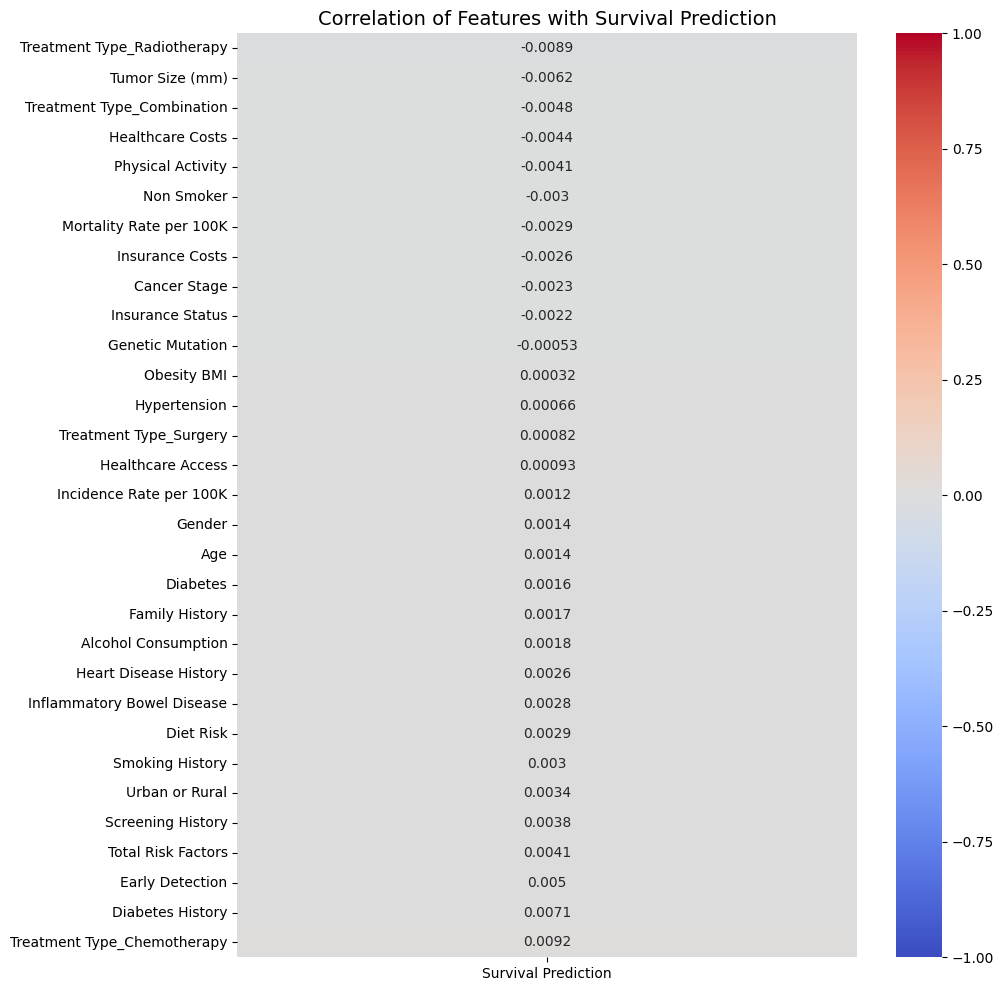

In [83]:
corr_target = train.corr()['Survival Prediction'].drop('Survival Prediction').sort_values()

plt.figure(figsize=(10, 12))
sns.heatmap(corr_target.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title("Correlation of Features with Survival Prediction", fontsize=14)
plt.show()


By the above heatmap we can see that none of the variables are highly correlated with the target variable.

In [84]:
corr_matrix = train.drop(columns='Survival Prediction').corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = []

for col1 in upper_triangle.columns:
    for col2 in upper_triangle.columns:
        value = upper_triangle.loc[col1, col2]
        if abs(value) > 0.9:
            high_corr_pairs.append((col1, col2, value))

for col1, col2, value in high_corr_pairs:
    print(f"{col1} ↔ {col2} | correlation: {value:.2f}")



Non Smoker ↔ Smoking History | correlation: -1.00


In [85]:
train = train.drop(columns=['Non Smoker'])

We removed the feature `Non Smoker` because it is perfectly negatively correlated `(r = –1.00)` with `Smoking History`. These two binary variables are exact opposites, so keeping both would introduce unnecessary redundancy. We kept `Smoking History` and dropped `Non Smoker` to reduce multicollinearity.

In [86]:
train_split = train

In [87]:
X = train_split.drop('Survival Prediction', axis = 1)
y = train_split['Survival Prediction']

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
train_split.head()

,Alcohol Consumption,Cancer Stage,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,...,Smoking History,Tumor Size (mm),Urban or Rural,Survival Prediction,Age,Treatment Type_Chemotherapy,Treatment Type_Combination,Treatment Type_Radiotherapy,Treatment Type_Surgery,Total Risk Factors
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,1,0,2,...,0,33.0,1,1,59,1.0,0.0,0.0,0.0,0.250
2,0,1,0,0,0,0,0,1,0,1,...,1,17.0,1,0,66,1.0,0.0,0.0,0.0,0.250
3,0,0,0,0,0,1,0,1,0,2,...,1,34.0,1,1,66,0.0,0.0,0.0,1.0,0.250
4,1,0,1,0,1,0,0,1,0,1,...,0,71.0,1,0,69,0.0,0.0,1.0,0.0,0.625
5,0,1,0,0,1,1,1,1,0,0,...,0,48.0,0,1,50,0.0,0.0,1.0,0.0,0.125


We applied a standard `80/20 train-validation` split using `train_test_split`. This ensures consistent evaluation while allowing the model to learn from a majority portion of the data.

# <font color='#BFD72F'> 4. Feature Selection </font>

## <font color='#BFD72F'> 4.1 Wrapper Method (RFE) </font>

In [90]:
train.head()

,Alcohol Consumption,Cancer Stage,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,...,Smoking History,Tumor Size (mm),Urban or Rural,Survival Prediction,Age,Treatment Type_Chemotherapy,Treatment Type_Combination,Treatment Type_Radiotherapy,Treatment Type_Surgery,Total Risk Factors
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,1,0,2,...,0,33.0,1,1,59,1.0,0.0,0.0,0.0,0.250
2,0,1,0,0,0,0,0,1,0,1,...,1,17.0,1,0,66,1.0,0.0,0.0,0.0,0.250
3,0,0,0,0,0,1,0,1,0,2,...,1,34.0,1,1,66,0.0,0.0,0.0,1.0,0.250
4,1,0,1,0,1,0,0,1,0,1,...,0,71.0,1,0,69,0.0,0.0,1.0,0.0,0.625
5,0,1,0,0,1,1,1,1,0,0,...,0,48.0,0,1,50,0.0,0.0,1.0,0.0,0.125


In [91]:
data = train.drop(['Survival Prediction'], axis=1)

In [92]:
target = train['Survival Prediction']

In [93]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [94]:
model = LogisticRegression(max_iter=1000)

In [95]:
rfe = RFE(estimator=model, n_features_to_select=10)

In [96]:
X_rfe = rfe.fit_transform(X=data_scaled, y=target)
X_rfe

array([[-0.01154508, -1.22108003,  0.14492833, ..., -0.50016658,
        -0.33558698, -0.39843864],
       [-0.01154508, -1.22108003, -0.35531904, ..., -0.50016658,
        -0.33558698, -0.39843864],
       [-0.01154508,  0.81894714, -0.22359839, ..., -0.50016658,
        -0.33558698, -0.39843864],
       ...,
       [-0.01154508,  0.81894714,  1.17347738, ..., -0.50016658,
        -0.33558698,  1.18899031],
       [-0.01154508,  0.81894714,  1.31655074, ..., -0.50016658,
        -0.33558698,  0.39527584],
       [-0.01154508, -1.22108003, -0.14358355, ...,  1.99933389,
        -0.33558698, -0.39843864]])

In [97]:
rfe.support_

array([False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True])

In [98]:
rfe.ranking_

array([14,  6, 15,  1,  4,  1, 11, 13, 20, 19,  1, 10, 21, 16,  8,  5,  7,
        3, 18,  1,  1,  9,  1,  2, 12,  1,  1,  1, 17,  1])

In [99]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

,0
Alcohol Consumption,False
Cancer Stage,False
Diabetes,False
Diabetes History,True
Diet Risk,False
Early Detection,True
Family History,False
Gender,False
Genetic Mutation,False
Healthcare Access,False


In [100]:
feature_scaler = MinMaxScaler().fit(X_train)

outro

In [ ]:
# Usar o mesmo X_train (pré-escalado, se necessário) e y_train definidos antes
# Se ainda não tiveres escalado X, podes aplicar o StandardScaler se quiseres (embora RandomForest não exija)

# Criar o classificador base
model = RandomForestClassifier(random_state=42)

# Aplicar RFECV
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='f1_weighted',
    n_jobs=-1
)

# Treinar o seletor de features com validação cruzada
rfecv.fit(X_train, y_train)

# Ver as features selecionadas
selected_features = X_train.columns[rfecv.support_]
print(f"Número ótimo de features: {rfecv.n_features_}")
print("Features selecionadas:", selected_features.tolist())

# <font color='#BFD72F'> 5. Models</font>